In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy  as sp
from scipy.optimize import minimize_scalar

### Градиентный спуск для функции одной переменной

In [2]:
x = sp.symbols('x')
f_x = 3*x**2
df_dx = sp.diff(f_x, x)
f = sp.lambdify(x, f_x, 'numpy')
df = sp.lambdify(x, df_dx, 'numpy')

x0 = 5
lamb = 0.1
res = []

while True:
    res.append((x0, f(x0))) 
    x1 = x0 - lamb*df(x0) 
    if np.linalg.norm(x0 - x1) < 0.00000001:
        break
    x0 = x1

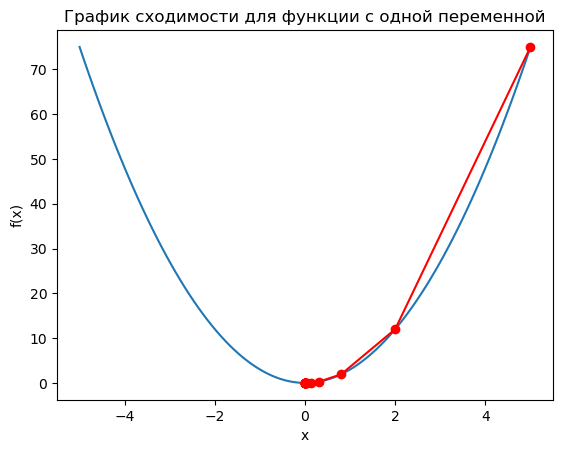

In [3]:
x = np.linspace(-5, 5, 100)
y = f(x)
plt.figure()
a, b = zip(*res) #список координат
plt.plot(x, y, label='f(x) = 3x^2')
plt.scatter(a, b, color='red', label ='итерации', zorder=5)
plt.plot(a, b, color='red', zorder=4) 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График сходимости для функции с одной переменной')
plt.show()

### Градиентный спуск для функции двух переменных

In [4]:
x, y = sp.symbols('x y')
f_xy = 3*x**2 + 5*y**2
df_dx = sp.diff(f_xy, x)
df_dy = sp.diff(f_xy, y)

f = sp.lambdify((x, y), f_xy, 'numpy')
df = np.array([sp.lambdify((x, y), df_dx, 'numpy'), 
               sp.lambdify((x, y), df_dy, 'numpy')])

lamb = 0.1
x0 = np.array([5, 10])
res = []

while True:
    res.append(x0.copy())
    grad = np.array([df[0](x0[0], x0[1]), df[1](x0[0], x0[1])])
    
    x1 = x0 - lamb*grad
    if np.linalg.norm(x1 - x0) <= 0.00000001:
        break
    x0 = x1

In [5]:
(x0 - x1) ** 2

array([2.78536509e-17, 0.00000000e+00])

### Метод наискорейшего спуска
это вариант градиентного метода, в котором величина шага на каждой итерации выбирается так, чтобы следующая итерация была точкой минимума функции.

#### функция с одной переменной

In [6]:
x = sp.symbols('x')
f_x = 3*x**2
df_dx = sp.diff(f_x, x)
f = sp.lambdify(x, f_x, 'numpy')
df = sp.lambdify(x, df_dx, 'numpy')

x0 = 5
res = []

while True:
    res.append((x0, f(x0))) 
    def f_lamb_1(lamb):
        return f(x0 - lamb*df(x0))
    
    lamb_new = minimize_scalar(f_lamb_1).x
    
    x1 = x0 - lamb_new*df(x0) 
    
    if np.linalg.norm(x0 - x1) < 0.00000001:
        break
    x0 = x1

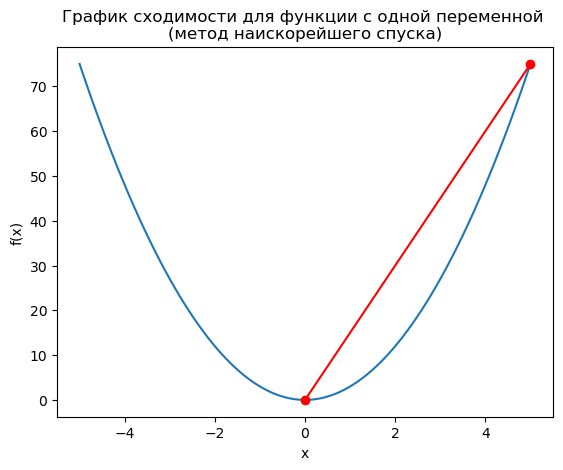

In [7]:
x = np.linspace(-5, 5, 100)
y = f(x)
plt.figure()
a, b = zip(*res) #список координат
plt.plot(x, y, label='f(x) = 3x^2')
plt.scatter(a, b, color='red', label ='итерации', zorder=5)
plt.plot(a, b, color='red', zorder=4) 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График сходимости для функции с одной переменной \n(метод наискорейшего спуска)')
plt.show()

#### функция с двумя переменными

In [8]:
x, y = sp.symbols('x y')
f_xy = 3*x**2 + 5*y**2
df_dx = sp.diff(f_xy, x)
df_dy = sp.diff(f_xy, y)

f = sp.lambdify((x, y), f_xy, 'numpy')
df = np.array([sp.lambdify((x, y), df_dx, 'numpy'), sp.lambdify((x, y), df_dy, 'numpy')])

lamb = 0.1
x0 = np.array([5, 10])
res = []

while True:
    res.append(x0.copy())
    def grad(x_val):
        return np.array([df[0](x_val[0], x_val[1]), df[1](x_val[0], x_val[1])])
    
    def f_lamb_2(lamb):
        x_new = x0 - lamb*grad(x0)
        return f(x_new[0], x_new[1])
    
    lamb_new = minimize_scalar(f_lamb_2).x 
    x1 = x0 - lamb_new*grad(x0)
    
    if np.linalg.norm(x1 - x0) <= 0.00000001:
        break
    x0 = x1

In [9]:
(x0 - x1) ** 2

array([2.99615302e-17, 2.69653772e-18])